In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
app_data = pd.read_csv(r"E:\Spectrum\Project 2\DataSet\application_record.csv")
app_data.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_data = pd.read_csv(r"E:\Spectrum\Project 2\DataSet\credit_record.csv")
credit_data.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
app_data.shape

(438557, 18)

In [6]:
credit_data.shape

(1048575, 3)

In [7]:
missing_app = app_data.isnull().sum().sort_values(ascending=False)
missing_credit = credit_data.isnull().sum().sort_values(ascending=False)

In [8]:
missing_app_percentage = (missing_app / len(app_data)) * 100
missing_credit_percentage = (missing_credit / len(credit_data)) * 100

In [9]:
missing_summary = pd.DataFrame({
    "application_record_missing": missing_app,
    "application_record_missing": missing_app_percentage
})

print("\nMissing Value Summary (application_record):")
print(missing_summary[missing_summary.application_record_missing > 0])


Missing Value Summary (application_record):
                 application_record_missing
OCCUPATION_TYPE                   30.601039


In [10]:
app_data["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6740\2806691152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_data["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)


In [11]:
print("\nRemaining missing values (application_record):")
print(app_data.isnull().sum().sort_values(ascending=False).head())


Remaining missing values (application_record):
ID                 0
CODE_GENDER        0
FLAG_OWN_CAR       0
FLAG_OWN_REALTY    0
CNT_CHILDREN       0
dtype: int64


In [12]:
# Define label for each customer based on STATUS in credit_record
# STATUS: 
# '0' = on-time, '1' = 30 days late, '2' = 60 days, ..., '5' = 150+ days late
# 'C' = closed, 'X' = no loan for the month

# Mark "bad" clients with any STATUS in ['2','3','4','5']

def classify_client(group):
    if any(status in ['2','3','4','5'] for status in group['STATUS'].values):
        return 1
    else:
        return 0

In [13]:
# Group by ID and apply function to get labels

label_df = credit_data.groupby('ID').apply(classify_client).reset_index()
label_df.columns = ['ID','TARGET']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6740\256751364.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  label_df = credit_data.groupby('ID').apply(classify_client).reset_index()


In [14]:
merged_df = pd.merge(app_data, label_df, on='ID')

In [15]:
print("Label Distribution:")
print(merged_df['TARGET'].value_counts())
print("\nPreview Merged Dataset:")
print(merged_df.head())

Label Distribution:
TARGET
0    35841
1      616
Name: count, dtype: int64

Preview Merged Dataset:
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAM

In [16]:
merged_df.drop('ID', axis=1, inplace=True)

In [17]:
merged_df.dtypes

CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
TARGET                   int64
dtype: object

In [18]:
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_encoded = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)

In [19]:
X = merged_encoded.drop('TARGET', axis=1)
y = merged_encoded['TARGET']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)

X_train shape: (29165, 47)
X_test shape: (7292, 47)


In [25]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [28]:
#Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [29]:
#Define Models
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=50, use_label_encoder=False, eval_metrics='logloss', random_state=42)

In [30]:
#Fit individual models
log_reg.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train_resampled, y_train_resampled)
xgb.fit(X_train_resampled, y_train_resampled)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [31]:
#Voting Ensemble
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)
voting_clf.fit(X_train_resampled, y_train_resampled)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=Non...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None, ...))],
                 voting='soft')

In [32]:
#Evaluate all models
models = {"Logistic Regression": log_reg, "Random Forest": rf, "XGBoost": xgb, "Voting Ensemble": voting_clf}

In [33]:
for name, model in models.items():
    print(f"\n{name} Performance:")
    y_pred = model.predict(X_test_scaled)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression Performance:
[[4243 2926]
 [  61   62]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      7169
           1       0.02      0.50      0.04       123

    accuracy                           0.59      7292
   macro avg       0.50      0.55      0.39      7292
weighted avg       0.97      0.59      0.73      7292

ROC AUC Score: 0.5551221553504417

Random Forest Performance:
[[7102   67]
 [  96   27]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7169
           1       0.29      0.22      0.25       123

    accuracy                           0.98      7292
   macro avg       0.64      0.61      0.62      7292
weighted avg       0.97      0.98      0.98      7292

ROC AUC Score: 0.8027596233557537

XGBoost Performance:
[[6308  861]
 [  64   59]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7169
    

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter= 10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train_resampled, y_train_resampled)
best_rf = rf_random.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [36]:
y_pred_rf = best_rf.predict(X_test_scaled)
print("Best Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1]))

Best Random Forest Performance:
[[7109   60]
 [ 102   21]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7169
           1       0.26      0.17      0.21       123

    accuracy                           0.98      7292
   macro avg       0.62      0.58      0.60      7292
weighted avg       0.97      0.98      0.98      7292

ROC AUC Score: 0.7902503665851277


In [37]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

y_pred_brf = brf.predict(X_test_scaled)
print("Balanced Random Forest:")
print(confusion_matrix(y_test, y_pred_brf))
print(classification_report(y_test, y_pred_brf))
print("ROC AUC Score:", roc_auc_score(y_test, brf.predict_proba(X_test_scaled)[:, 1]))

Balanced Random Forest:
[[7163    6]
 [ 120    3]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7169
           1       0.33      0.02      0.05       123

    accuracy                           0.98      7292
   macro avg       0.66      0.51      0.52      7292
weighted avg       0.97      0.98      0.98      7292

ROC AUC Score: 0.6290351297989196


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
import joblib

#Save Model
joblib.dump(best_rf,"best_random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [39]:
report = classification_report(y_test, y_pred_rf)
with open("model_performance.txt","w") as f:
    f.write(report)

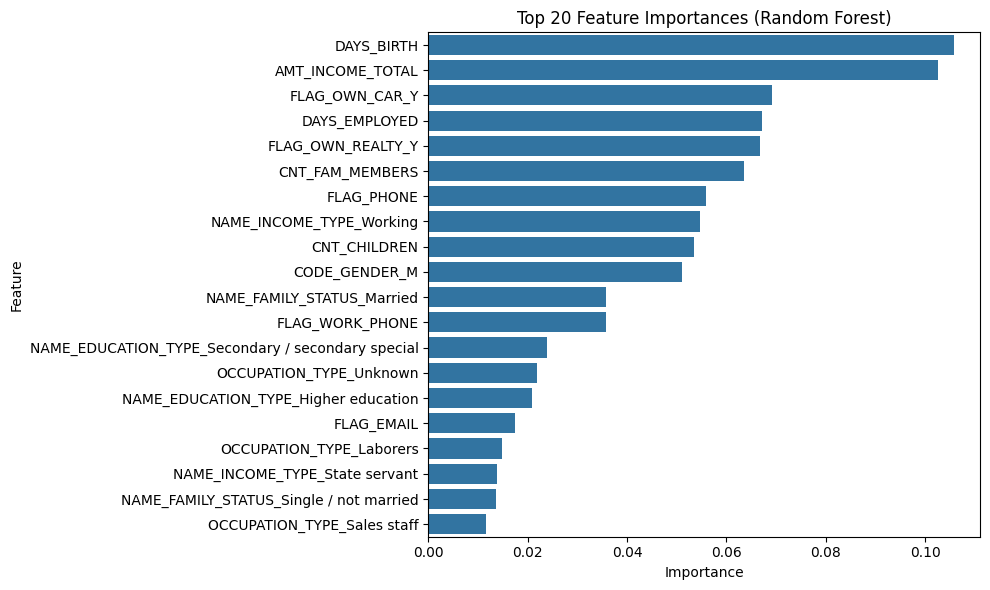


Features with near-zero importance:
                                  Feature  Importance
37     OCCUPATION_TYPE_Low-skill Laborers    0.000688
40  OCCUPATION_TYPE_Private service staff    0.000607
33               OCCUPATION_TYPE_HR staff    0.000399
46   OCCUPATION_TYPE_Waiters/barmen staff    0.000173
41          OCCUPATION_TYPE_Realty agents    0.000047
14               NAME_INCOME_TYPE_Student    0.000005
4                              FLAG_MOBIL    0.000000


In [40]:
#Get feature importance from best_rf
importances = best_rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

print("\nFeatures with near-zero importance:")
print(feat_imp_df[feat_imp_df['Importance'] < 0.001])

In [41]:
# Drop features with near-zero importance
to_drop = [
    'FLAG_MOBIL', 
    'NAME_INCOME_TYPE_Student',
    'OCCUPATION_TYPE_Realty agents',
    'OCCUPATION_TYPE_Waiters/barmen staff',
    'OCCUPATION_TYPE_HR staff',
    'OCCUPATION_TYPE_Private service staff',
    'OCCUPATION_TYPE_Low-skill Laborers'
]

X_cleaned = X.drop(columns=to_drop)

In [42]:
#Redo train/test split
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_cleaned, y, test_size=0.2, stratify=y, random_state=42
)

#Redo scaling
scaler_clean = StandardScaler()
X_train_clean_scaled = scaler_clean.fit_transform(X_train_clean)
X_test_clean_scaled = scaler_clean.transform(X_test_clean)

#Retrain model
best_rf.fit(X_train_clean_scaled, y_train_clean)
y_pred_clean = best_rf.predict(X_test_clean_scaled)

print("Evaluation after Removing Weak Features:")
print(confusion_matrix(y_test_clean, y_pred_clean))
print(classification_report(y_test_clean, y_pred_clean))
print("ROC AUC:", roc_auc_score(y_test_clean, best_rf.predict_proba(X_test_clean_scaled)[:, 1]))

Evaluation after Removing Weak Features:
[[6966  203]
 [  75   48]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7169
           1       0.19      0.39      0.26       123

    accuracy                           0.96      7292
   macro avg       0.59      0.68      0.62      7292
weighted avg       0.98      0.96      0.97      7292

ROC AUC: 0.7714516090620523


In [43]:
xgb = XGBClassifier(scale_pos_weight=50, eval_metrics='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train_clean_scaled, y_train_clean)

y_pred_xgb = xgb.predict(X_test_clean_scaled)
print("XGBoost Performance:")
print(confusion_matrix(y_test_clean, y_pred_xgb))
print(classification_report(y_test_clean, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test_clean, xgb.predict_proba(X_test_clean_scaled)[:, 1]))

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:
[[6873  296]
 [  65   58]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7169
           1       0.16      0.47      0.24       123

    accuracy                           0.95      7292
   macro avg       0.58      0.72      0.61      7292
weighted avg       0.98      0.95      0.96      7292

ROC AUC: 0.7379140313930688


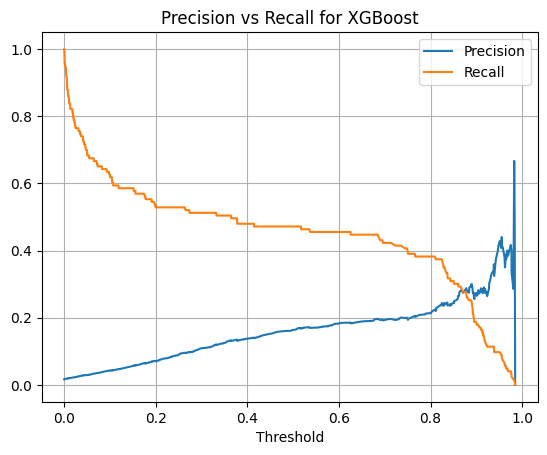

In [45]:
from sklearn.metrics import precision_recall_curve

y_probs_xgb = xgb.predict_proba(X_test_clean_scaled)[:, 1]
prec, rec, thresh = precision_recall_curve(y_test_clean, y_probs_xgb)

plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.grid()
plt.legend()
plt.title('Precision vs Recall for XGBoost')
plt.show()

In [46]:
optimal_thresh = 0.25
y_pred_opt = (y_probs_xgb >= optimal_thresh).astype(int)

print("Confusion Matrix (Threshold = 0.25):")
print(confusion_matrix(y_test_clean, y_pred_opt))

print("\nClassification Report (Threshold = 0.25):")
print(classification_report(y_test_clean, y_pred_opt))

print("ROC AUC(unchanged):", roc_auc_score(y_test_clean, y_probs_xgb))

Confusion Matrix (Threshold = 0.25):
[[6514  655]
 [  58   65]]

Classification Report (Threshold = 0.25):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      7169
           1       0.09      0.53      0.15       123

    accuracy                           0.90      7292
   macro avg       0.54      0.72      0.55      7292
weighted avg       0.98      0.90      0.93      7292

ROC AUC(unchanged): 0.7379140313930688


In [47]:
joblib.dump(xgb, "xgboost_final_model.pkl")
joblib.dump(scaler_clean, "final_scaler.pkl")

#save threshold info
with open("decision_threshold.txt", "w") as f:
    f.write("Final XGBoost threshold: 0.25")

In [48]:
# Manually compiled performance from model outputs
comparison_data = [
    # Format: (Model, Features, Threshold, ROC AUC, Recall_1, Precision_1, F1_1)
    ("Logistic Regression", "Original", "0.5", 0.555, 0.50, 0.02, 0.04),
    ("Random Forest", "Original", "0.5", 0.709, 0.22, 0.29, 0.25),
    ("Tuned Random Forest", "Original", "0.5", 0.790, 0.17, 0.26, 0.21),
    ("Balanced RF", "Original", "0.5", 0.629, 0.02, 0.33, 0.05),
    ("Tuned RF", "Reduced", "0.5", 0.771, 0.39, 0.19, 0.26),
    ("XGBoost", "Reduced", "0.5", 0.738, 0.47, 0.16, 0.24),
    ("XGBoost", "Reduced", "0.25", 0.738, 0.53, 0.09, 0.15),
]

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=[
    "Model", "Features Used", "Threshold", "ROC AUC", 
    "Recall (Bad Clients)", "Precision (Bad Clients)", 
    "F1-score (Bad Clients)"
])

# Display neatly
comparison_df.style.set_caption("Model Comparison Summary").format({
    "ROC AUC": "{:.3f}",
    "Recall (Bad Clients)": "{:.2f}",
    "Precision (Bad Clients)": "{:.2f}",
    "F1-score (Bad Clients)": "{:.2f}"
})


,Model,Features Used,Threshold,ROC AUC,Recall (Bad Clients),Precision (Bad Clients),F1-score (Bad Clients)
0,Logistic Regression,Original,0.5,0.555,0.50,0.02,0.04
1,Random Forest,Original,0.5,0.709,0.22,0.29,0.25
2,Tuned Random Forest,Original,0.5,0.790,0.17,0.26,0.21
3,Balanced RF,Original,0.5,0.629,0.02,0.33,0.05
4,Tuned RF,Reduced,0.5,0.771,0.39,0.19,0.26
5,XGBoost,Reduced,0.5,0.738,0.47,0.16,0.24
6,XGBoost,Reduced,0.25,0.738,0.53,0.09,0.15
